In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("Uber/Uber-Jan-Feb-FOIL.csv")
df.head()


,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [3]:
df["active_vehicles"].max()

4395

**Exponential distirbution**

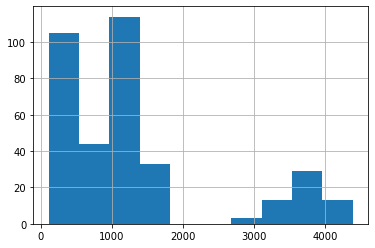

In [4]:
df.active_vehicles.hist()

Text(0, 0.5, 'frequency of active vehicle')

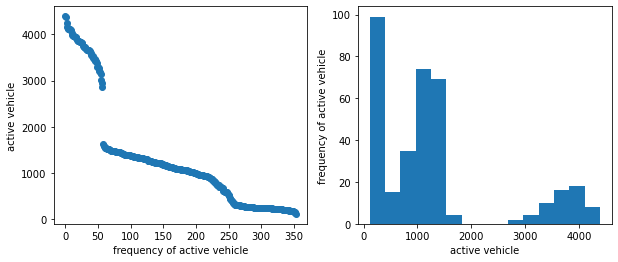

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(sorted(df.active_vehicles)[::-1], 'o')
ax1.set_xlabel('frequency of active vehicle')
ax1.set_ylabel("active vehicle")

ax2.hist(df.active_vehicles, bins=15)
ax2.set_xlabel("active vehicle")
ax2.set_ylabel('frequency of active vehicle')

In [5]:
smean = df["active_vehicles"].mean()
rate = 1./ smean
rate

0.0007648563625678432

In [6]:
smax = df["active_vehicles"].max()
days = np.linspace(0., smax, 1000)
# bin size: interval between two consecutive values in `days`
dt = smax / 999.

In [7]:
import scipy.stats as st

In [8]:
dist_exp = st.expon.pdf(days, scale=1. / rate)

In [9]:
st.expon.pdf(days, scale=1. / rate)

array([7.64856363e-04, 7.62287016e-04, 7.59726301e-04, 7.57174187e-04,
       7.54630647e-04, 7.52095651e-04, 7.49569171e-04, 7.47051178e-04,
       7.44541644e-04, 7.42040540e-04, 7.39547837e-04, 7.37063508e-04,
       7.34587525e-04, 7.32119859e-04, 7.29660483e-04, 7.27209368e-04,
       7.24766488e-04, 7.22331813e-04, 7.19905317e-04, 7.17486973e-04,
       7.15076752e-04, 7.12674628e-04, 7.10280573e-04, 7.07894560e-04,
       7.05516563e-04, 7.03146554e-04, 7.00784506e-04, 6.98430393e-04,
       6.96084188e-04, 6.93745865e-04, 6.91415397e-04, 6.89092757e-04,
       6.86777920e-04, 6.84470858e-04, 6.82171547e-04, 6.79879960e-04,
       6.77596071e-04, 6.75319854e-04, 6.73051283e-04, 6.70790333e-04,
       6.68536978e-04, 6.66291193e-04, 6.64052952e-04, 6.61822229e-04,
       6.59599001e-04, 6.57383240e-04, 6.55174923e-04, 6.52974024e-04,
       6.50780519e-04, 6.48594382e-04, 6.46415589e-04, 6.44244115e-04,
       6.42079936e-04, 6.39923026e-04, 6.37773363e-04, 6.35630920e-04,
      

Text(0, 0.5, 'frequency of active vehicle')

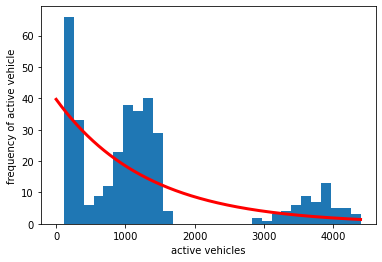

In [10]:
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(df["active_vehicles"], nbins)
ax.plot(days, dist_exp * len(df["active_vehicles"]) * smax / nbins,
        '-r', lw=3)
ax.set_xlabel("active vehicles")
ax.set_ylabel("frequency of active vehicle")

In [11]:
dist = st.expon
args = dist.fit(df["active_vehicles"])
args

(112.0, 1195.4350282485875)

In [12]:
st.kstest(df["active_vehicles"], dist.cdf, args)

KstestResult(statistic=0.1279541479476194, pvalue=1.6381896881967153e-05)

In [13]:
dist = st.fatiguelife
args = dist.fit(df["active_vehicles"])
st.kstest(df["active_vehicles"], dist.cdf, args)

KstestResult(statistic=0.576695457972642, pvalue=4.0339901299531948e-112)

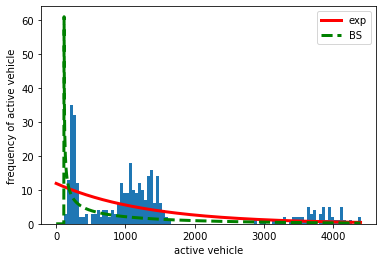

In [14]:
dist_fl = dist.pdf(days, *args)
nbins = 100
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(df["active_vehicles"], nbins)
ax.plot(days, dist_exp * len(df["active_vehicles"]) * smax / nbins,
        '-r', lw=3, label='exp')
ax.plot(days, dist_fl * len(df["active_vehicles"]) * smax / nbins,
        '--g', lw=3, label='BS')
ax.set_xlabel("active vehicle")
ax.set_ylabel("frequency of active vehicle")
ax.legend()